### Начало лабораторной
Выгрузка данных из csv файла в датафрейм

In [17]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stocks.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


#### Диаграмма числа продаж акций за год за весь период времени
Данная диаграмма отображает зависимость обьема продаж от окончательных цен акций за каждый период что позволяет сделать вывод о том, что при низкой цене акций на них растет спрос. Однако если объемы растут, а цены - нет, то, возможно, это может свидетельствовать о нежелании инвесторов поддерживать высокую стоимость акций.

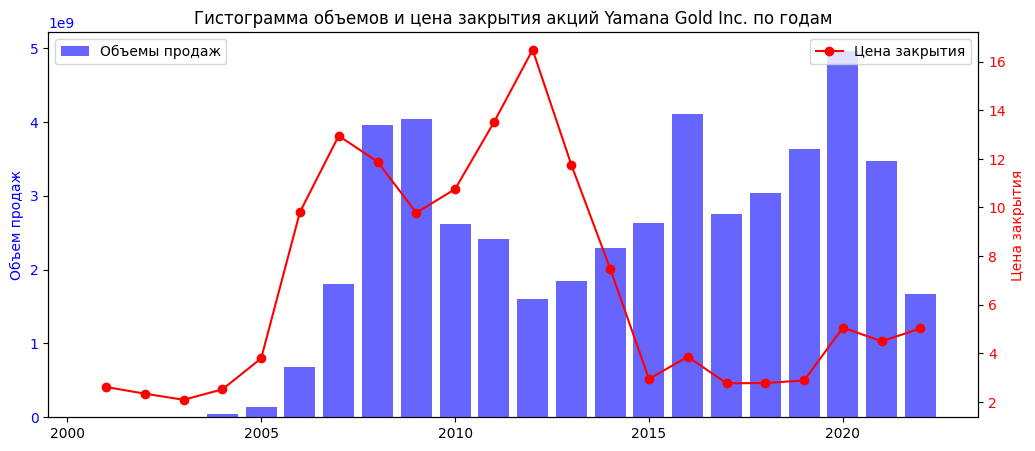

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Читаем данные из CSV файла
df = pd.read_csv(".//static//csv//Stocks.csv")

# Преобразуем колонку 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Добавляем колонку с годом
df['Year'] = df['Date'].dt.year

# Группируем данные по годам и суммируем объемы и цены закрытия
annual_data = df.groupby('Year').agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Создаем график
fig, ax1 = plt.subplots(figsize=(12, 5))

# Строим гистограмму объемов
ax1.bar(annual_data['Year'], annual_data['Volume'], color='b', alpha=0.6, label='Объемы продаж')
ax1.set_ylabel('Объем продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаем вторую ось для отображения цены закрытия
ax2 = ax1.twinx()
ax2.plot(annual_data['Year'], annual_data['Close'], color='r', marker='o', label='Цена закрытия')
ax2.set_ylabel('Цена закрытия', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Добавляем заголовок и легенды
plt.title('Гистограмма объемов и цена закрытия акций Yamana Gold Inc. по годам')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Отображаем график
plt.show()

#### График визуализаций цен акций Yamana Gold Inc. 
Данный график отображает годовые цены акций, т.е. стоимость открытия, стоимость закрытия, максимум и минимум, что позволяет сделать вывод о тенденциях - если свеча красная - то цена открытия больше цены закрытия(т.е. стоимость акции в тот год преимущественно падала), иначе - если зеленая - то цена закрытия больше цены открытия(т.е. стоимотсь акции в тот год преимущественно росла)

In [15]:
import pandas as pd
import plotly.graph_objects as go

# Считываем данные
df = pd.read_csv(".//static//csv//Stocks.csv")

# Преобразуем 'Date' в datetime формат
df['Date'] = pd.to_datetime(df['Date'])

# Устанавливаем 'Date' как индекс
df.set_index('Date', inplace=True)

# Ресемплируем данные по году
df_yearly = df.resample('YE').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Создаем список дат для каждой свечи
df_yearly['Date'] = df_yearly.index

# Создаем свечной график
fig = go.Figure(data=[go.Candlestick(
    x=df_yearly['Date'],
    open=df_yearly['Open'],
    high=df_yearly['High'],
    low=df_yearly['Low'],
    close=df_yearly['Close'],
    name='Candlestick',
    increasing_line_color='green',  # Увеличивающиеся свечи зелёные
    decreasing_line_color='red'      # Уменьшающиеся свечи красные
)])

# Обновляем метки и заголовок
fig.update_layout(
    title='Свечной график акций Yamana Gold Inc. за каждый год',
    title_x=0.5,  # Центруем заголовок
    xaxis_title='Год',
    yaxis_title='Цена ($)',
    xaxis_rangeslider_visible=False,
    plot_bgcolor='rgba(240, 240, 240, 0.95)',  # Цвет фона графика
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  # Сетка по оси X
    yaxis=dict(showgrid=True, gridcolor='LightGray')   # Сетка по оси Y
)


# Показываем график
fig.show()

#### График динамики объемов торгов акций Yamana Gold Inc. 
Данный график отображает динамику объемов торгов на акции компании, что позволяет сделать вывод о том, что на момент 2022 года объем продаж рос, следовательно у компании сейчас успешные времена, т.к. их акции пользуются популярностью

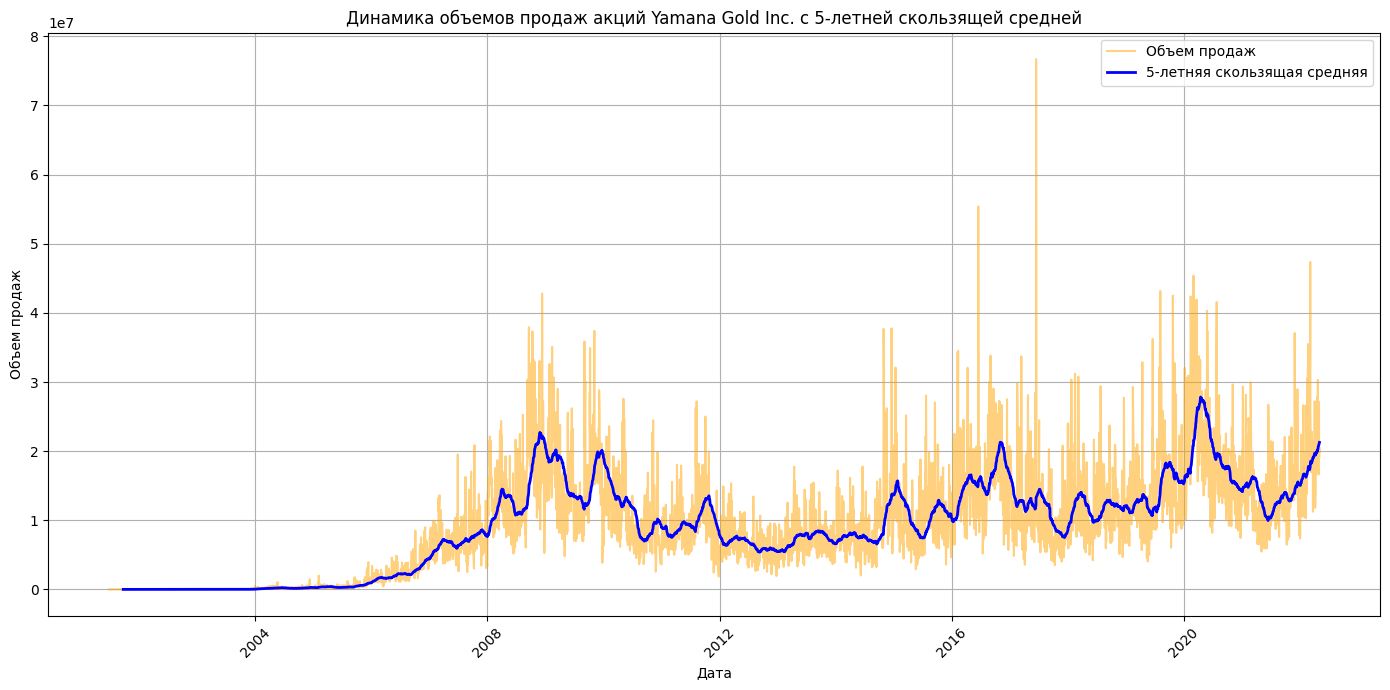

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Считываем данные
df = pd.read_csv(".//static//csv//Stocks.csv")

# Преобразуем колонку 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Устанавливаем дату в качестве индекса
df.set_index('Date', inplace=True)

# Рассчитываем 12-месячную скользящую среднюю для объемов продаж
df['Volume_SMA'] = df['Volume'].rolling(window=60).mean()

# Создаем график объемов продаж
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Объем продаж', color='orange', alpha=0.5)
plt.plot(df.index, df['Volume_SMA'], label='5-летняя скользящая средняя', color='blue', linewidth=2)

# Настройки графика
plt.title('Динамика объемов продаж акций Yamana Gold Inc. с 5-летней скользящей средней')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для удобства
plt.tight_layout()  # Подгоняем график

# Показать график
plt.show()